# factors that influence US home prices:

 Importing all the necessary librabies

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


Importing datasets

In [50]:
supply_data = pd.read_csv("supply.csv")
demand_data = pd.read_csv("demand.csv")

In [51]:
demand_data.head

<bound method NDFrame.head of           DATE   CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS  \
0   01-01-2003  129.321000      5.840769  79.966667       2.250000  186000   
1   01-04-2003  131.756000      5.506923  89.266667       2.166667  191800   
2   01-07-2003  135.013000      6.033846  89.300000       2.000000  191900   
3   01-10-2003  138.835667      5.919286  91.966667       2.000000  198800   
4   01-01-2004  143.298667      5.597500  98.000000       2.000000  212700   
..         ...         ...           ...        ...            ...     ...   
76  01-01-2022  290.868000      3.822308  63.133333            NaN  433100   
77  01-04-2022  303.422667      5.266154  57.866667            NaN  449300   
78  01-07-2022  301.726333      5.623077  56.100000            NaN  468000   
79  01-10-2022  297.896667      6.664615  58.800000            NaN  479500   
80  01-01-2023         NaN      6.372308  64.633333            NaN  436800   

          GDP  
0   11174.129  
1

In [52]:
supply_data.head

<bound method NDFrame.head of           DATE    CSUSHPISA       MSACSR       PERMIT    TLRESCONS  \
0   01-01-2003      129.321          4.2  1806.333333  421328.6667   
1   01-04-2003      131.756  3.833333333  1837.666667  429308.6667   
2   01-07-2003      135.013  3.633333333  1937.333333       458890   
3   01-10-2003  138.8356667  3.966666667  1972.333333  491437.3333   
4   01-01-2004  143.2986667          3.7  1994.666667  506856.3333   
..         ...          ...          ...          ...          ...   
77  01-04-2022  303.4226667          8.7  1734.666667  947300.3333   
78  01-07-2022  301.7263333  9.566666667  1610.666667       910346   
79  01-10-2022  297.8966667          9.2  1455.333333  870620.6667   
80  01-01-2023            .  8.033333333  1424.333333  842559.6667   
81  01-04-2023            .            .            .            .   

   EVACANTUSQ176N  
0           14908  
1           15244  
2           15614  
3           15654  
4           15895  
..       

In [53]:
supply_data['DATE'] = pd.to_datetime(supply_data['DATE'])
demand_data['DATE'] = pd.to_datetime(demand_data['DATE'])

supply_data = supply_data.sort_values('DATE')
demand_data = demand_data.sort_values('DATE')

merged_data = pd.merge(supply_data, demand_data, on='DATE', suffixes=('_supply', '_demand'))

merged_data.dropna(subset=['MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N', 'MORTGAGE30US', 'GDP', 'UMCSENT'], inplace=True)

imputer = SimpleImputer(strategy='mean')
merged_data['INTDSRUSM193N'] = imputer.fit_transform(merged_data[['INTDSRUSM193N']])

merged_data = merged_data.reset_index(drop=True)

In [54]:
merged_data.drop('CSUSHPISA_supply', axis=1, inplace=True)

merged_data.rename(columns={'CSUSHPISA_demand': 'CSUSHPISA'}, inplace=True)
merged_data['CSUSHPISA'] = merged_data['CSUSHPISA'].fillna(merged_data['CSUSHPISA'].mean())

In [55]:
merged_data.head

<bound method NDFrame.head of          DATE       MSACSR       PERMIT    TLRESCONS EVACANTUSQ176N  \
0  2003-01-01          4.2  1806.333333  421328.6667          14908   
1  2003-01-04  3.833333333  1837.666667  429308.6667          15244   
2  2003-01-07  3.633333333  1937.333333       458890          15614   
3  2003-01-10  3.966666667  1972.333333  491437.3333          15654   
4  2004-01-01          3.7  1994.666667  506856.3333          15895   
..        ...          ...          ...          ...            ...   
76 2022-01-01  6.233333333         1864       910611          15166   
77 2022-01-04          8.7  1734.666667  947300.3333          15286   
78 2022-01-07  9.566666667  1610.666667       910346          15306   
79 2022-01-10          9.2  1455.333333  870620.6667          14554   
80 2023-01-01  8.033333333  1424.333333  842559.6667          15053   

     CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS        GDP  
0   129.321000      5.840769  79.966667  

# Exploratory Data Analysis (patterns or correlations):

In [56]:
correlation = merged_data.corr()['CSUSHPISA']
correlation_table = pd.DataFrame(correlation).reset_index()
correlation_table.columns = ['Factors', 'Correlation with CSUSHPISA']
print(correlation_table)

           Factors  Correlation with CSUSHPISA
0             DATE                    0.726768
1           MSACSR                    0.121048
2           PERMIT                    0.382217
3        TLRESCONS                    0.861225
4   EVACANTUSQ176N                   -0.584710
5        CSUSHPISA                    1.000000
6     MORTGAGE30US                   -0.215379
7          UMCSENT                   -0.096213
8    INTDSRUSM193N                    0.102608
9            MSPUS                    0.907924
10             GDP                    0.823877


In [57]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])
merged_data.set_index('DATE', inplace=True)

merged_data['MSACSR'] = pd.to_numeric(merged_data['MSACSR'], errors='coerce')
merged_data['PERMIT'] = pd.to_numeric(merged_data['PERMIT'], errors='coerce')
merged_data['TLRESCONS'] = pd.to_numeric(merged_data['TLRESCONS'], errors='coerce')
merged_data['EVACANTUSQ176N'] = pd.to_numeric(merged_data['EVACANTUSQ176N'], errors='coerce')

# Visualization Analysis:

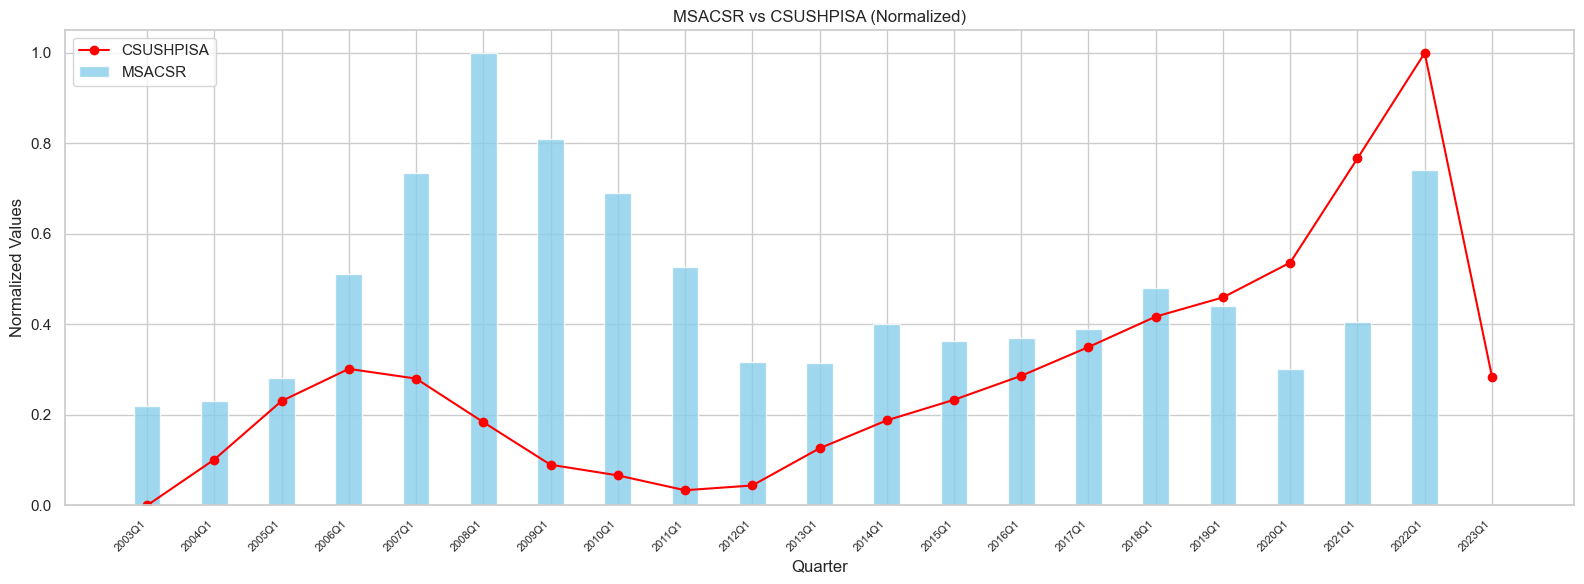

In [58]:
# merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])
# merged_data.set_index('DATE', inplace=True)


merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)


grouped_data = merged_data.groupby('QUARTER').agg({'MSACSR': 'sum', 'CSUSHPISA': 'mean'}).reset_index()


scaler = MinMaxScaler()
grouped_data[['MSACSR', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MSACSR', 'CSUSHPISA']])


grouped_data = grouped_data.sort_values('QUARTER')


plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8


plt.bar(grouped_data['QUARTER'], grouped_data['MSACSR'], width=bar_width, alpha=opacity, color='skyblue', label='MSACSR')


plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('MSACSR vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()
plt.show()

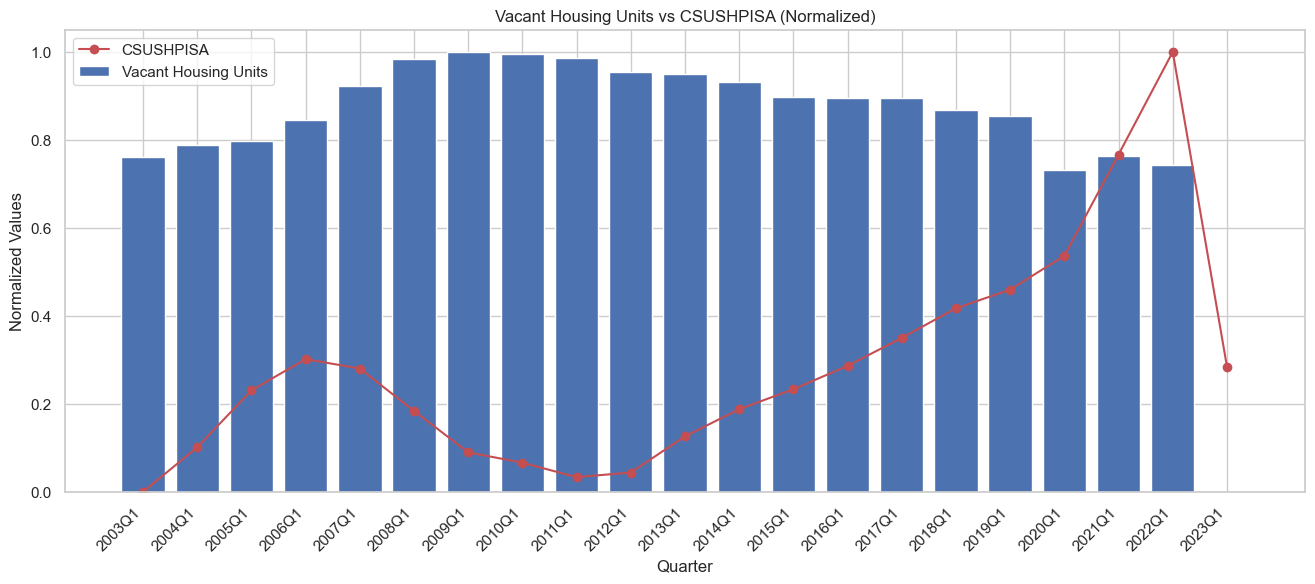

In [59]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of EVACANTUSQ176N and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'EVACANTUSQ176N': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['EVACANTUSQ176N', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['EVACANTUSQ176N', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

plt.bar(grouped_data['QUARTER'], grouped_data['EVACANTUSQ176N'], label='Vacant Housing Units')
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='r', label='CSUSHPISA')

plt.title('Vacant Housing Units vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis tick labels for better readability
plt.show()

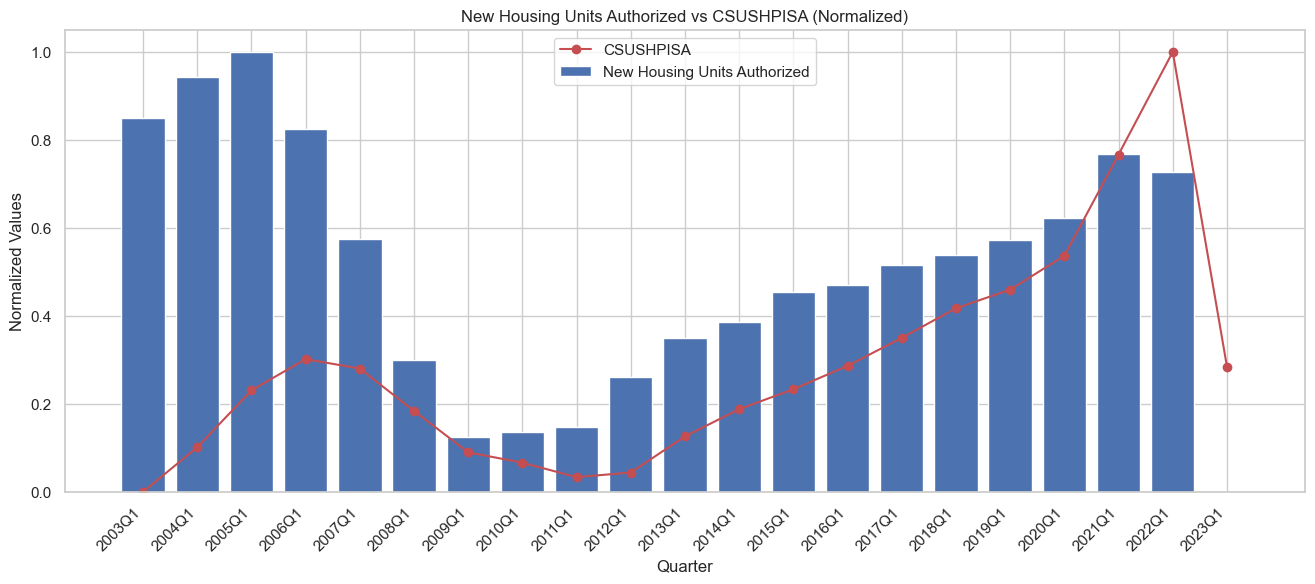

In [60]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of PERMIT and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'PERMIT': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['PERMIT', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['PERMIT', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

plt.bar(grouped_data['QUARTER'], grouped_data['PERMIT'], label='New Housing Units Authorized')
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='r', label='CSUSHPISA')

plt.title('New Housing Units Authorized vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis tick labels for better readability

plt.show()

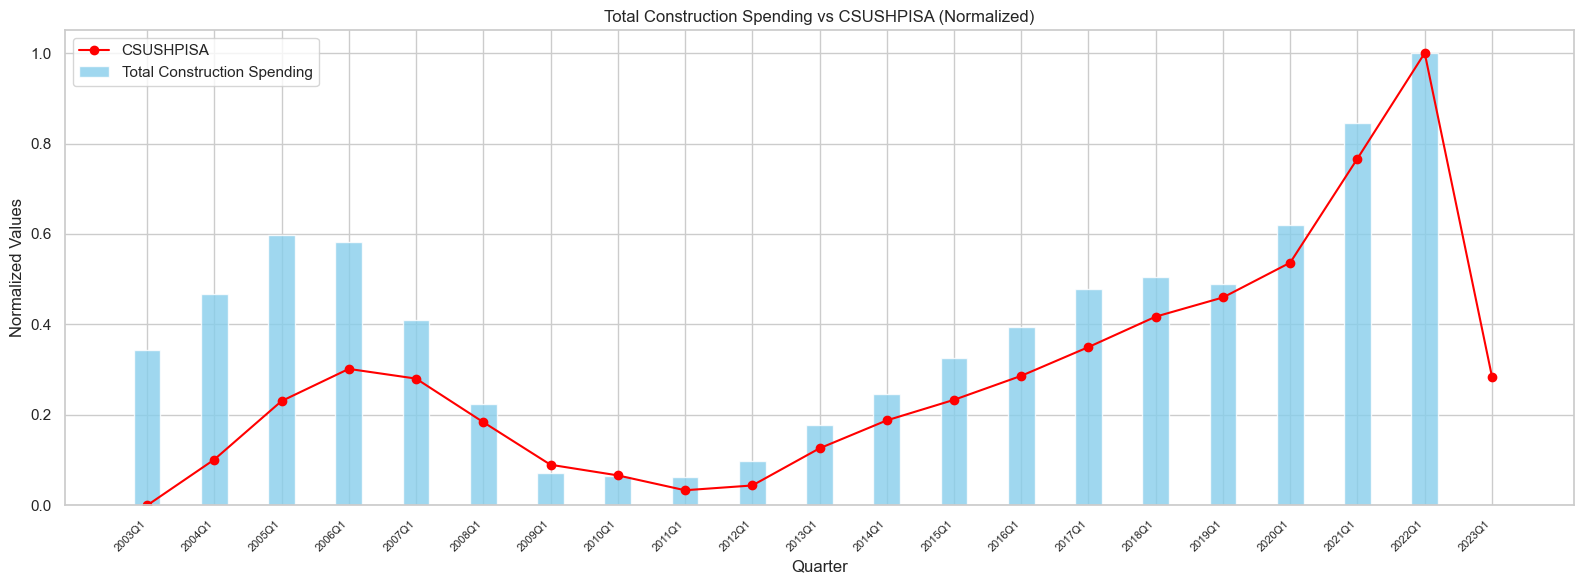

In [61]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of TLRESCONS and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'TLRESCONS': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['TLRESCONS', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['TLRESCONS', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for TLRESCONS (New Housing Units Authorized)
plt.bar(grouped_data['QUARTER'], grouped_data['TLRESCONS'], width=bar_width, alpha=opacity, color='skyblue', label='Total Construction Spending')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Total Construction Spending vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

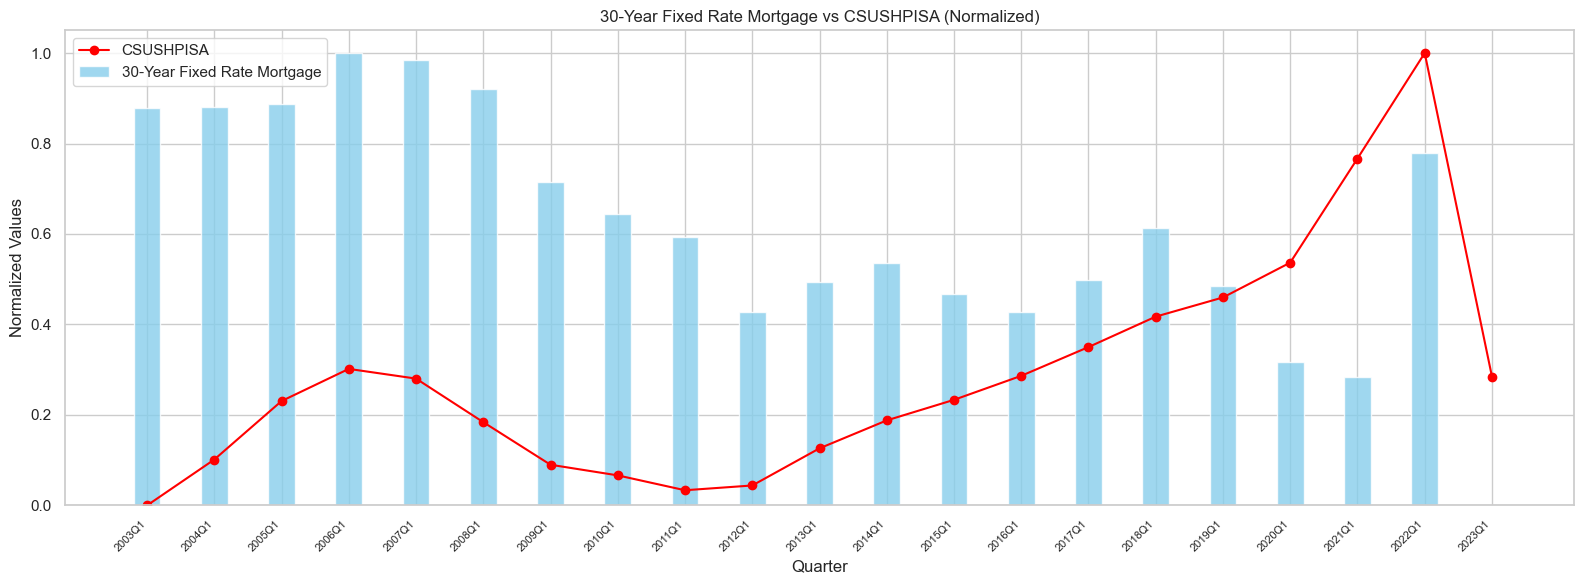

In [62]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of MORTGAGE30US and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'MORTGAGE30US': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['MORTGAGE30US', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MORTGAGE30US', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for MORTGAGE30US
plt.bar(grouped_data['QUARTER'], grouped_data['MORTGAGE30US'], width=bar_width, alpha=opacity, color='skyblue', label='30-Year Fixed Rate Mortgage')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('30-Year Fixed Rate Mortgage vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

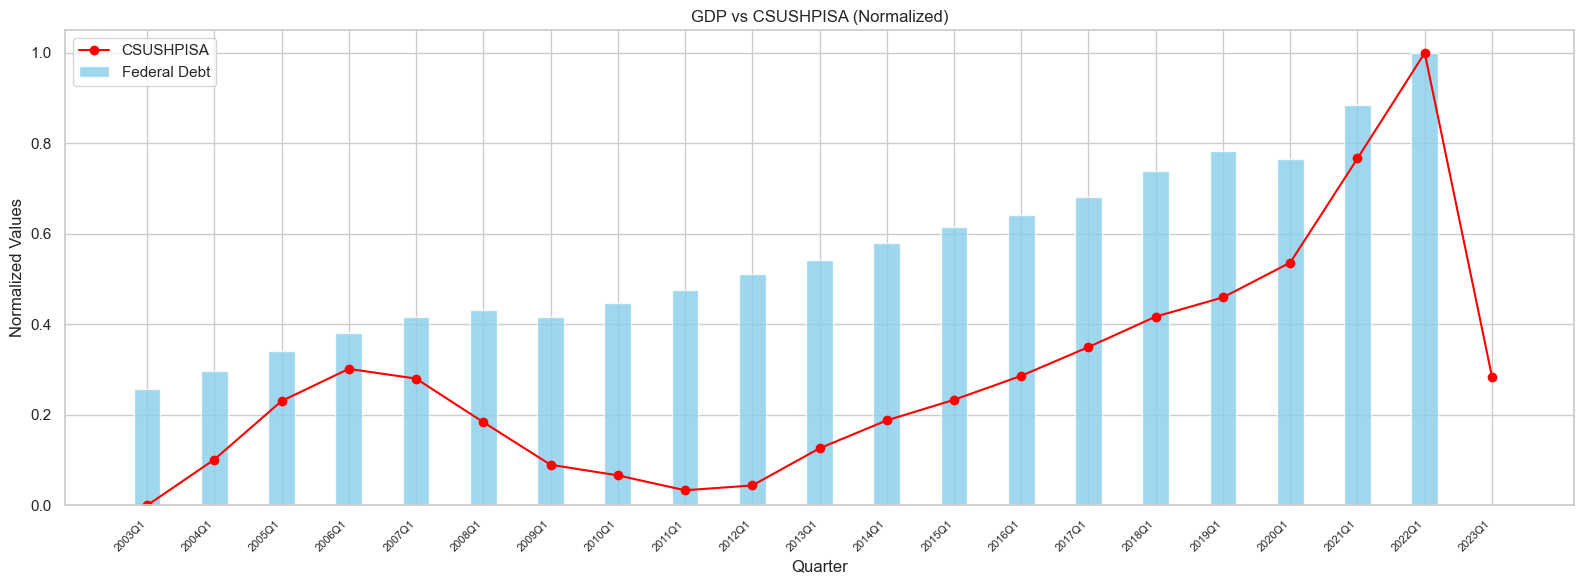

In [63]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of GFDEGDQ188S and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'GDP': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['GDP', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['GDP', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for GFDEGDQ188S
plt.bar(grouped_data['QUARTER'], grouped_data['GDP'], width=bar_width, alpha=opacity, color='skyblue', label='Federal Debt')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('GDP vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

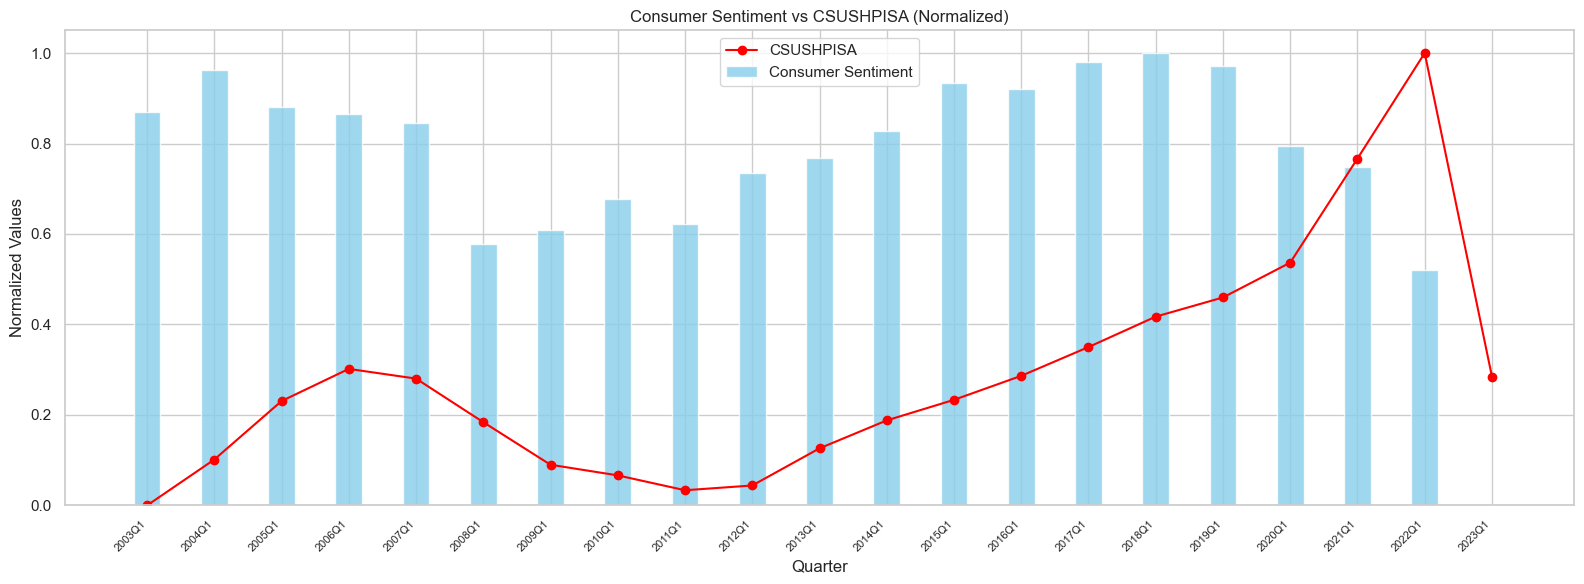

In [64]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of UMCSENT and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'UMCSENT': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['UMCSENT', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['UMCSENT', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for UMCSENT
plt.bar(grouped_data['QUARTER'], grouped_data['UMCSENT'], width=bar_width, alpha=opacity, color='skyblue', label='Consumer Sentiment')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Consumer Sentiment vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

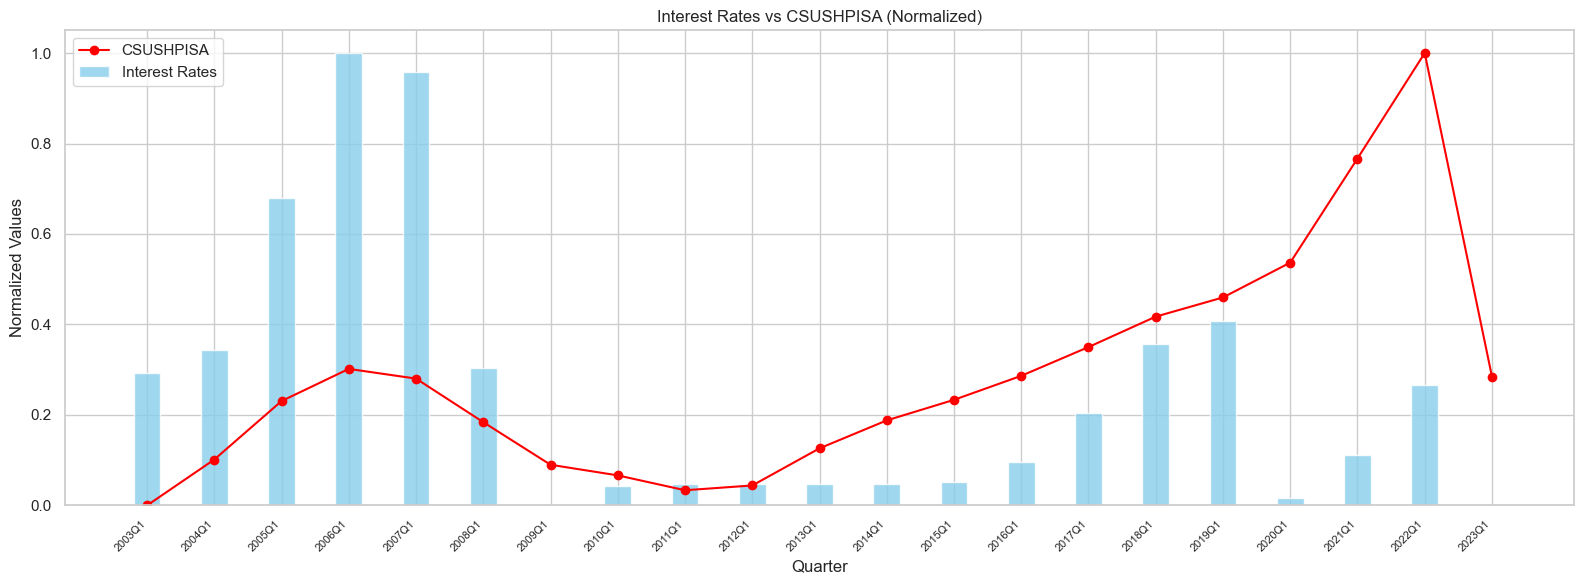

In [65]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of INTDSRUSM193N and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'INTDSRUSM193N': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['INTDSRUSM193N', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['INTDSRUSM193N', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for INTDSRUSM193N
plt.bar(grouped_data['QUARTER'], grouped_data['INTDSRUSM193N'], width=bar_width, alpha=opacity, color='skyblue', label='Interest Rates')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Interest Rates vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

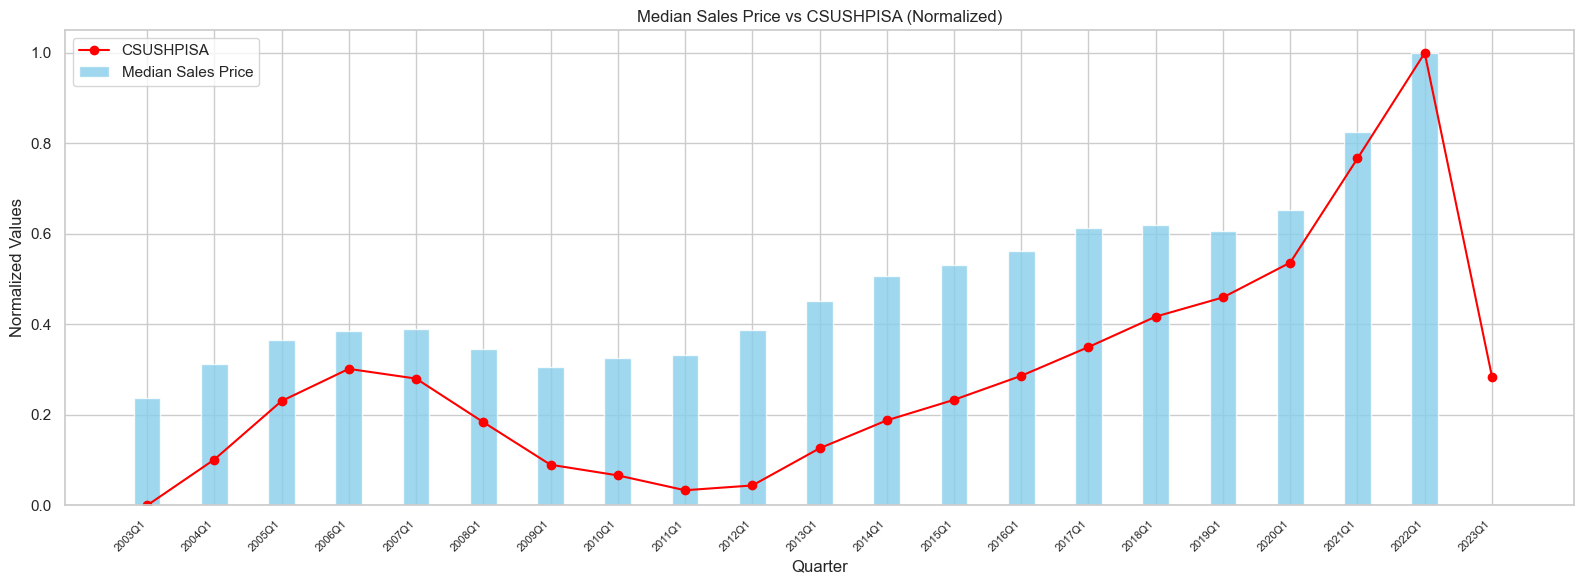

In [66]:
merged_data['QUARTER'] = merged_data.index.to_period('Q')
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of MSPUS and the average of CSUSHPISA for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'MSPUS': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['MSPUS', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MSPUS', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for MSPUS
plt.bar(grouped_data['QUARTER'], grouped_data['MSPUS'], width=bar_width, alpha=opacity, color='skyblue', label='Median Sales Price')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Median Sales Price vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()


# Model Building

In [67]:
features = ['MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N', 'MORTGAGE30US', 'GDP', 'UMCSENT', 'INTDSRUSM193N', 'MSPUS']
target = 'CSUSHPISA'

X_train, X_test, y_train, y_test = train_test_split(merged_data[features], merged_data[target], test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    results[model_name] = avg_mse


best_model = min(results, key=results.get)
best_model_instance = models[best_model]


best_model_instance.fit(X_train, y_train)


predictions = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, predictions)


print("Model Selection Results:")
for model, mse_score in results.items():
    print(f"{model}: MSE={mse_score}")

print(f"\nBest Model: {best_model}")
print(f"Best Model MSE on Testing Set: {mse}")

Model Selection Results:
Linear Regression: MSE=292.5422837890577
Decision Tree: MSE=567.2447311228971
Random Forest: MSE=368.04008656600297
Support Vector Regression: MSE=1566.0538093551377
Neural Network: MSE=117172101.1551564

Best Model: Linear Regression
Best Model MSE on Testing Set: 33.179634824989215


C:\Users\mohda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


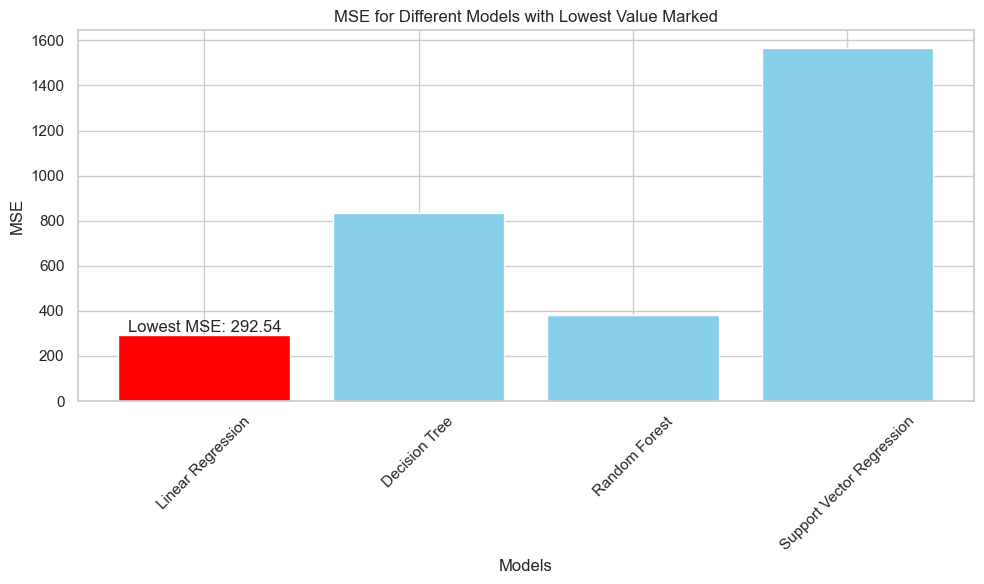

In [68]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Support Vector Regression"]
mse_scores = [292.5422837890577, 832.8218593333098, 381.7539192911807, 1566.0538093551377]

# Find the index of the lowest MSE score
lowest_index = np.argmin(mse_scores)

# Create a list of colors, setting the lowest MSE score to a different color
colors = ['skyblue' if i != lowest_index else 'red' for i in range(len(model_names))]

# Create a bar chart with marked lowest value
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mse_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE for Different Models with Lowest Value Marked')
plt.xticks(rotation=45)

# Add annotations to the lowest value
plt.text(lowest_index, mse_scores[lowest_index], f'Lowest MSE: {mse_scores[lowest_index]:.2f}', ha='center', va='bottom')

# Show the chart
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print("R-squared score:", r2)

R-squared score: 0.972328153245582


In [70]:
best_model_instance.fit(X_train, y_train)

coefficients = best_model_instance.coef_


print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

Coefficients:
MSACSR: 8.179306396114981
PERMIT: 0.019751930454263482
TLRESCONS: 5.69315716369102e-05
EVACANTUSQ176N: -0.0013309828088841462
MORTGAGE30US: -14.994935732273278
GDP: -0.003034615996585022
UMCSENT: -0.18699748490155266
INTDSRUSM193N: 3.972030401368383
MSPUS: 0.00045593039550578807


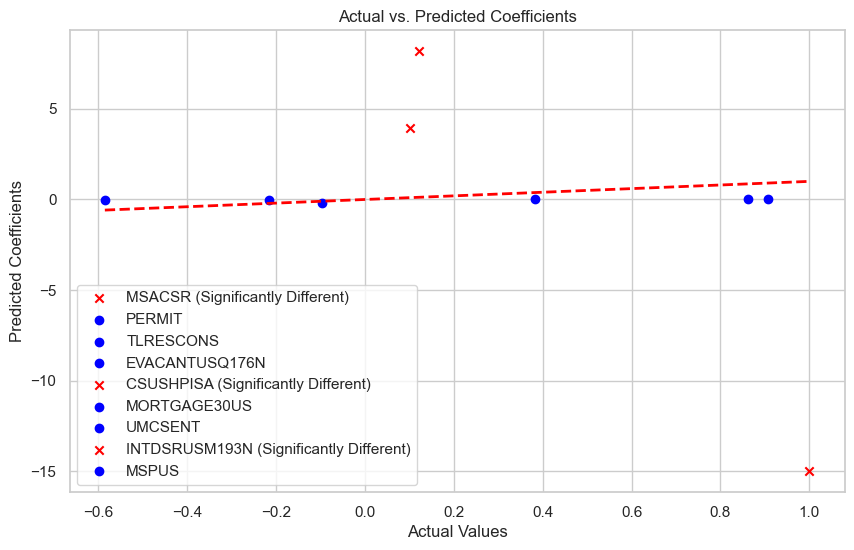

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Actual values and predicted coefficients
actual_values = [0.121048, 0.382217, 0.861225, -0.584710, 1.000000, -0.215379, -0.096213, 0.102608, 0.907924]
predicted_coefficients = [8.179306396114981, 0.019751930454263482, 5.69315716369102e-05, -0.0013309828088841462, -14.994935732273278, -0.003034615996585022, -0.18699748490155266, 3.972030401368383, 0.00045593039550578807]
data_point_names = ['MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N', 'CSUSHPISA', 'MORTGAGE30US', 'UMCSENT', 'INTDSRUSM193N', 'MSPUS']

# Set a threshold for highlighting significantly different points
threshold = 2.0  # You can adjust this threshold

# Create a scatter plot with labels
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for i in range(len(actual_values)):
    diff = np.abs(actual_values[i] - predicted_coefficients[i])
    if diff > threshold:
        plt.scatter(actual_values[i], predicted_coefficients[i], c='red', marker='x', label=f"{data_point_names[i]} (Significantly Different)")
    else:
        plt.scatter(actual_values[i], predicted_coefficients[i], c='blue', marker='o', label=data_point_names[i])

plt.xlabel('Actual Values')
plt.ylabel('Predicted Coefficients')
plt.title('Actual vs. Predicted Coefficients')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='red', linewidth=2)

# Add legend
plt.legend()

plt.show()
